In [161]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:

vehicles_df = pd.read_csv('../Traffic_Crashes_-_Vehicles_20241007.csv', low_memory=False)
people_df = pd.read_csv('../Traffic_Crashes_-_People_20241007.csv', low_memory=False)
crashes_df = pd.read_csv('../Traffic_Crashes_-_Crashes_20241007.csv', low_memory=False)

In [96]:
vehicles_df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,NaN,1637408.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
unit_type_value_counts = vehicles_df.groupby('UNIT_TYPE')['UNIT_TYPE'].count().reset_index(name='count')
unit_type_value_counts

,UNIT_TYPE,count
0,BICYCLE,14291
1,DISABLED VEHICLE,274
2,DRIVER,1503708
3,DRIVERLESS,14362
4,EQUESTRIAN,7
5,NON-CONTACT VEHICLE,325
6,NON-MOTOR VEHICLE,1621
7,PARKED,236910
8,PEDESTRIAN,22729


In [98]:
people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


In [99]:
crashes_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN


In [100]:
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880397 entries, 0 to 880396
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                880397 non-null  object 
 1   CRASH_DATE_EST_I               65239 non-null   object 
 2   CRASH_DATE                     880397 non-null  object 
 3   POSTED_SPEED_LIMIT             880397 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         880397 non-null  object 
 5   DEVICE_CONDITION               880397 non-null  object 
 6   WEATHER_CONDITION              880397 non-null  object 
 7   LIGHTING_CONDITION             880397 non-null  object 
 8   FIRST_CRASH_TYPE               880397 non-null  object 
 9   TRAFFICWAY_TYPE                880397 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      880397 non-null  object 
 12  ROADWAY_SURFACE_COND          

## <span style="color:red"> DATA DESCRIPTION </span>

### <span style="color:red"> Traffic Crashes - Vehicles
Rows 1.77M
Columns 71
Each row is a Vehicle

This dataset contains information about vehicles (or units as they are identified in crash reports) involved in a traffic crash. This dataset should be used in conjunction with the traffic Crash and People dataset available in the portal. “Vehicle” information includes motor vehicle and non-motor vehicle modes of transportation, such as bicycles and pedestrians. Each mode of transportation involved in a crash is a “unit” and get one entry here. Each vehicle, each pedestrian, each motorcyclist, and each bicyclist is considered an independent unit that can have a trajectory separate from the other units. However, people inside a vehicle including the driver do not have a trajectory separate from the vehicle in which they are travelling and hence only the vehicle they are travelling in get any entry here. This type of identification of “units” is needed to determine how each movement affected the crash. Data for occupants who do not make up an independent unit, typically drivers and passengers, are available in the People table. Many of the fields are coded to denote the type and location of damage on the vehicle. Vehicle information can be linked back to Crash data using the “CRASH_RECORD_ID” field. Since this dataset is a combination of vehicles, pedestrians, and pedal cyclists not all columns are applicable to each record. Look at the Unit Type field to determine what additional data may be available for that record.

The Chicago Police Department reports crashes on IL Traffic Crash Reporting form SR1050. The crash data published on the Chicago data portal mostly follows the data elements in SR1050 form. The current version of the SR1050 instructions manual with detailed information on each data elements is available here.

This data contains information about people involved in a crash and if any injuries were sustained. This dataset should be used in combination with the traffic Crash and Vehicle dataset. Each record corresponds to an occupant in a vehicle listed in the Crash dataset. Some people involved in a crash may not have been an occupant in a motor vehicle, but may have been a pedestrian, bicyclist, or using another non-motor vehicle mode of transportation. Injuries reported are reported by the responding police officer. Fatalities that occur after the initial reports are typically updated in these records up to 30 days after the date of the crash. Person data can be linked with the Crash and Vehicle dataset using the “CRASH_RECORD_ID” field. A vehicle can have multiple occupants and hence have a one to many relationship between Vehicle and Person dataset. However, a pedestrian is a “unit” by itself and have a one to one relationship between the Vehicle and Person table.


The Chicago Police Department reports crashes on IL Traffic Crash Reporting form SR1050. The crash data published on the Chicago data portal mostly follows the data elements in SR1050 form. The current version of the SR1050 instructions manual with detailed information on each data elements is available here.

Change 11/21/2023: We have removed the RD_NO (Chicago Police Department report number) for privacy reasons.

### <span style="color:red"> Traffic Crashes - People

This data contains information about people involved in a crash and if any injuries were sustained. This dataset should be used in combination with the traffic Crash and Vehicle dataset. Each record corresponds to an occupant in a vehicle listed in the Crash dataset. Some people involved in a crash may not have been an occupant in a motor vehicle, but may have been a pedestrian, bicyclist, or using another non-motor vehicle mode of transportation. Injuries reported are reported by the responding police officer. Fatalities that occur after the initial reports are typically updated in these records up to 30 days after the date of the crash. Person data can be linked with the Crash and Vehicle dataset using the “CRASH_RECORD_ID” field. A vehicle can have multiple occupants and hence have a one to many relationship between Vehicle and Person dataset. However, a pedestrian is a “unit” by itself and have a one to one relationship between the Vehicle and Person table.


Rows 1.9M
Columns 29
Each row is a Person

| Field Name             | Description                                                                                  |
|----------------------------|----------------------------------------------------------------------------------------------|
| `zipcode`                  | ZIP Code of residence of person involved in crash                                            |
| `vehicle_id`               | The corresponding CRASH_UNIT_ID from the Vehicles dataset.                                   |
| `state`                    | State of residence of person involved in crash                                               |
| `sex`                      | Gender of person involved in crash, as determined by reporting officer                       |
| `seat_no`                  | Code for seating position of motor vehicle occupant: 1= driver, 2= center front, etc.        |
| `safety_equipment`         | Safety equipment used by vehicle occupant in crash, if any                                   |
| `physical_condition`       | Driver’s apparent physical condition at time of crash, as observed by the reporting officer  |
| `person_type`              | Type of roadway user involved in crash                                                       |
| `person_id`                | A unique identifier for each person record.                                                  |
| `pedpedal_visibility`      | Visibility of pedestrian or cyclist safety equipment in use at time of crash                 |
| `pedpedal_location`        | Location of pedestrian or cyclist at the time of crash                                       |
| `pedpedal_action`          | Action of pedestrian or cyclist at the time of crash                                         |
| `injury_classification`    | Severity of injury person sustained in the crash                                             |
| `hospital`                 | Hospital to which person injured in the crash was taken                                      |
| `ems_run_no`               | EMS agency run number                                                                        |
| `ems_agency`               | EMS agency who transported person injured in crash to the hospital                           |
| `ejection`                 | Whether vehicle occupant was ejected or extricated from the vehicle as a result of crash     |
| `drivers_license_state`    | State issuing driver's license of person involved in crash                                   |
| `drivers_license_class`    | Class of driver's license of person involved in crash                                        |
| `driver_vision`            | What, if any, objects obscured the driver’s vision at time of crash                          |
| `driver_action`            | Driver action that contributed to the crash, as determined by reporting officer              |
| `crash_record_id`          | This number can be used to link to the same crash in the Crashes and Vehicles datasets.      |
| `crash_date`               | Date and time of crash as entered by the reporting officer                                   |
| `city`                     | City of residence of person involved in crash                                                |
| `cell_phone_use`           | Whether person was/was not using cellphone at the time of the crash, as determined by the officer|
| `bac_result_value`         | Driver’s blood alcohol concentration test result (fatal crashes may include pedestrian results)|
| `bac_result`               | Status of blood alcohol concentration testing for driver or other person involved in crash   |
| `airbag_deployed`          | Whether vehicle occupant airbag deployed as result of crash                                  |
| `age`                      | Age of person involved in crash                                                              |


In [101]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934071 entries, 0 to 1934070
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

In [102]:
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880397 entries, 0 to 880396
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                880397 non-null  object 
 1   CRASH_DATE_EST_I               65239 non-null   object 
 2   CRASH_DATE                     880397 non-null  object 
 3   POSTED_SPEED_LIMIT             880397 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         880397 non-null  object 
 5   DEVICE_CONDITION               880397 non-null  object 
 6   WEATHER_CONDITION              880397 non-null  object 
 7   LIGHTING_CONDITION             880397 non-null  object 
 8   FIRST_CRASH_TYPE               880397 non-null  object 
 9   TRAFFICWAY_TYPE                880397 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      880397 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [103]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796451 entries, 0 to 1796450
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   CRASH_UNIT_ID             int64  
 1   CRASH_RECORD_ID           object 
 2   CRASH_DATE                object 
 3   UNIT_NO                   int64  
 4   UNIT_TYPE                 object 
 5   NUM_PASSENGERS            float64
 6   VEHICLE_ID                float64
 7   CMRC_VEH_I                object 
 8   MAKE                      object 
 9   MODEL                     object 
 10  LIC_PLATE_STATE           object 
 11  VEHICLE_YEAR              float64
 12  VEHICLE_DEFECT            object 
 13  VEHICLE_TYPE              object 
 14  VEHICLE_USE               object 
 15  TRAVEL_DIRECTION          object 
 16  MANEUVER                  object 
 17  TOWED_I                   object 
 18  FIRE_I                    object 
 19  OCCUPANT_CNT              float64
 20  EXCEED_SPEED_LIMIT_I    

In [ ]:
## Feature Engineering

In [157]:
def categorize_cause(cause):
    if cause in [
        'FAILING TO YIELD RIGHT-OF-WAY', 'FOLLOWING TOO CLOSELY', 'IMPROPER LANE USAGE',
        'DISREGARDING TRAFFIC SIGNALS', 'DISTRACTION - FROM INSIDE VEHICLE',
        'DISTRACTION - FROM OUTSIDE VEHICLE', 'IMPROPER TURNING/NO SIGNAL',
        'IMPROPER BACKING', 'TURNING RIGHT ON RED', 'DRIVING ON WRONG SIDE/WRONG WAY',
        'DISREGARDING STOP SIGN', 'CELL PHONE USE OTHER THAN TEXTING', 'TEXTING',
        'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)'
    ]:
        return 'Driver Error'

    elif cause in [
        'WEATHER', 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 'ROADWAY SURFACE COND_ICE',
        'ROAD CONSTRUCTION/MAINTENANCE', 'ROAD DEFECT_UNKNOWN', 'LIGHTING_CONDITION_DARKNESS',
        'LIGHTING_CONDITION_DAWN', 'LIGHTING_CONDITION_DUSK'
    ]:
        return 'Environmental Factors'

    elif cause in [
        'EQUIPMENT - VEHICLE CONDITION', 'BRAKE FAILURE', 'TIRE FAILURE', 'ENGINE FAILURE',
        'AIRBAG DEPLOYED_DID NOT DEPLOY'
    ]:
        return 'Mechanical Failures'

    elif cause in [
        'PEDESTRIAN ACTIONS', 'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 'RELATED TO BUS STOP',
        'OBSTRUCTED CROSSWALKS', 'ELECTRONIC DEVICE USE BY PEDESTRIAN'
    ]:
        return 'Pedestrian/Cyclist Errors'

    elif cause in [
        'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)', 'PHYSICAL CONDITION OF DRIVER',
        'SLEEPING AT THE WHEEL'
    ]:
        return 'Alcohol/Drugs and Physical Condition'

    else:
        return 'Other'


In [158]:
crashes_df['PRIM_CONTRIBUTORY_CAUSE_GROUPED'] = crashes_df['PRIM_CONTRIBUTORY_CAUSE'].apply(categorize_cause)
crashes_df = crashes_df.drop(columns=['PRIM_CONTRIBUTORY_CAUSE'])

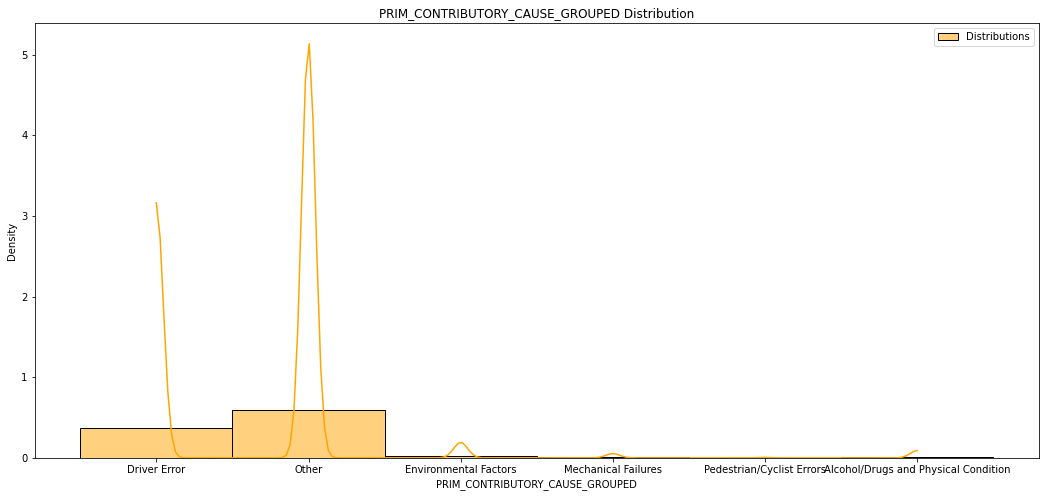

In [162]:
# Compare the distribution of variables in our target
plt.figure(figsize=(18, 8))

sns.histplot(crashes_df['PRIM_CONTRIBUTORY_CAUSE_GROUPED'], color='orange', label='Distributions', stat='density', kde=True)

plt.legend()
plt.title('PRIM_CONTRIBUTORY_CAUSE_GROUPED Distribution')
plt.show()

In [159]:
vehicles_df.isnull().sum()

CRASH_UNIT_ID                    0
CRASH_RECORD_ID                  0
CRASH_DATE                       0
UNIT_NO                          0
UNIT_TYPE                     2224
                            ...   
CARGO_BODY_TYPE            1782101
LOAD_TYPE                  1782735
HAZMAT_OUT_OF_SERVICE_I    1783911
MCS_OUT_OF_SERVICE_I       1783676
HAZMAT_CLASS               1795301
Length: 71, dtype: int64

In [117]:
vehicles_df.shape

(1796451, 71)

In [118]:
vehicles_df.duplicated().sum()

0

In [104]:
crashes_df.duplicated().sum()

0

In [105]:
crashes_df.isnull().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 815158
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         681380
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       27042
CRASH_TYPE                            0
INTERSECTION_RELATED_I           678466
NOT_RIGHT_OF_WAY_I               840169
HIT_AND_RUN_I                    604340
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [106]:
crashes_df.shape

(880397, 48)

In [107]:
crashes_df.isna().mean()

CRASH_RECORD_ID                  0.000000
CRASH_DATE_EST_I                 0.925898
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
LANE_CNT                         0.773946
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      0.030716
CRASH_TYPE                       0.000000
INTERSECTION_RELATED_I           0.770636
NOT_RIGHT_OF_WAY_I               0.954307
HIT_AND_RUN_I                    0.686440
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
STREET_NO                        0

## Cleaning

### Missing Values

Columns to drop:

Crashes:

* `RD_NO` is a police ID number, withheld for recent crashes; reduntant w/ `CRASH_RECORD_ID`
* `REPORT_TYPE` not relevant to conditions in a crash
* `CRASH_DATE` is redundant with data in people
* `DATE_POLICE_NOTIFIED` - an after the accident feature not used for prediction
* `STREET_NO`, `STREET_DIRECTION`, `STREET_NAME` are all location related
* All the `INJURIES_` columns--colinearity issues w/individual injury data

People:

* `RD_NO` is a police ID number, withheld for recent crashes; reduntant w/ `CRASH_RECORD_ID`
* `CITY` and `ZIPCODE`; just use `STATE` to determine driver residence

In [108]:
crashes_cols_to_drop = ['CRASH_DATE', 'REPORT_TYPE', 'DATE_POLICE_NOTIFIED', 'STREET_NO', 'STREET_DIRECTION', 
                        'STREET_NAME',
                        'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
                        'INJURIES_UNKNOWN', 'MOST_SEVERE_INJURY']

people_cols_to_drop = ['CITY', 'ZIPCODE']

vehicles_col_to_drop = []

In [109]:
crashes_df = crashes_df.drop(crashes_cols_to_drop, axis=1)

people_df = people_df.drop(people_cols_to_drop, axis=1)

In [110]:
def dropna_columns(df, threshold=.5):
    '''
    Drop columns from a Pandas DataFrame in which more than a certain
    percentage (default=80%) of their rows are null/NaN.
    '''
    return df.dropna(thresh=(((1-threshold) * df.shape[0])) + 1, axis=1)

In [119]:
crashes_dropped_df = dropna_columns(crashes_df)
people_dropped_df = dropna_columns(people_df)
vehicles_dropped_df = dropna_columns(vehicles_df)

In [136]:
crashes_dropped_df = crashes_dropped_df.dropna()

In [137]:
crashes_dropped_df.isnull().sum()

CRASH_RECORD_ID                0
POSTED_SPEED_LIMIT             0
TRAFFIC_CONTROL_DEVICE         0
DEVICE_CONDITION               0
WEATHER_CONDITION              0
LIGHTING_CONDITION             0
FIRST_CRASH_TYPE               0
TRAFFICWAY_TYPE                0
ALIGNMENT                      0
ROADWAY_SURFACE_COND           0
ROAD_DEFECT                    0
CRASH_TYPE                     0
DAMAGE                         0
PRIM_CONTRIBUTORY_CAUSE        0
SEC_CONTRIBUTORY_CAUSE         0
BEAT_OF_OCCURRENCE             0
NUM_UNITS                      0
INJURIES_TOTAL                 0
INJURIES_FATAL                 0
INJURIES_INCAPACITATING        0
INJURIES_NON_INCAPACITATING    0
CRASH_HOUR                     0
CRASH_DAY_OF_WEEK              0
CRASH_MONTH                    0
LATITUDE                       0
LONGITUDE                      0
LOCATION                       0
dtype: int64

In [138]:
crashes_dropped_df.shape

(872192, 27)

In [131]:
people_dropped_df = people_dropped_df.dropna()

In [132]:
people_dropped_df.isnull().sum()

PERSON_ID                0
PERSON_TYPE              0
CRASH_RECORD_ID          0
VEHICLE_ID               0
CRASH_DATE               0
STATE                    0
SEX                      0
AGE                      0
DRIVERS_LICENSE_STATE    0
SAFETY_EQUIPMENT         0
AIRBAG_DEPLOYED          0
EJECTION                 0
INJURY_CLASSIFICATION    0
DRIVER_ACTION            0
DRIVER_VISION            0
PHYSICAL_CONDITION       0
BAC_RESULT               0
dtype: int64

In [133]:
people_dropped_df.shape

(1012383, 17)

In [127]:
vehicles_dropped_df = vehicles_dropped_df.dropna()

In [129]:
vehicles_dropped_df.shape

(1427108, 17)

In [128]:
vehicles_dropped_df.isnull().sum()

CRASH_UNIT_ID          0
CRASH_RECORD_ID        0
CRASH_DATE             0
UNIT_NO                0
UNIT_TYPE              0
VEHICLE_ID             0
MAKE                   0
MODEL                  0
LIC_PLATE_STATE        0
VEHICLE_YEAR           0
VEHICLE_DEFECT         0
VEHICLE_TYPE           0
VEHICLE_USE            0
TRAVEL_DIRECTION       0
MANEUVER               0
OCCUPANT_CNT           0
FIRST_CONTACT_POINT    0
dtype: int64

## Merging into one dataframe
Since we are focusing on predicting individual outcomes in crashes, we will merge on `people_dropped_df` in a left join with `crashes_dropped_df`.

In [142]:
people_crashes_df = people_dropped_df.merge(crashes_dropped_df, on='CRASH_RECORD_ID', how='left')

In [143]:
people_crashes_df.shape

(1012383, 43)

In [146]:
vehicles_people_crashes_df = people_crashes_df.merge(vehicles_dropped_df, on='CRASH_RECORD_ID', how='left')

In [147]:
vehicles_people_crashes_df.shape

(1904796, 59)

In [148]:
vehicles_people_crashes_df.isnull().sum()

PERSON_ID                          0
PERSON_TYPE                        0
CRASH_RECORD_ID                    0
VEHICLE_ID_x                       0
CRASH_DATE_x                       0
STATE                              0
SEX                                0
AGE                                0
DRIVERS_LICENSE_STATE              0
SAFETY_EQUIPMENT                   0
AIRBAG_DEPLOYED                    0
EJECTION                           0
INJURY_CLASSIFICATION              0
DRIVER_ACTION                      0
DRIVER_VISION                      0
PHYSICAL_CONDITION                 0
BAC_RESULT                         0
POSTED_SPEED_LIMIT             16690
TRAFFIC_CONTROL_DEVICE         16690
DEVICE_CONDITION               16690
WEATHER_CONDITION              16690
LIGHTING_CONDITION             16690
FIRST_CRASH_TYPE               16690
TRAFFICWAY_TYPE                16690
ALIGNMENT                      16690
ROADWAY_SURFACE_COND           16690
ROAD_DEFECT                    16690
C

In [149]:
vehicles_people_crashes_df = vehicles_people_crashes_df.dropna()

In [150]:
vehicles_people_crashes_df.isnull().sum()

PERSON_ID                      0
PERSON_TYPE                    0
CRASH_RECORD_ID                0
VEHICLE_ID_x                   0
CRASH_DATE_x                   0
STATE                          0
SEX                            0
AGE                            0
DRIVERS_LICENSE_STATE          0
SAFETY_EQUIPMENT               0
AIRBAG_DEPLOYED                0
EJECTION                       0
INJURY_CLASSIFICATION          0
DRIVER_ACTION                  0
DRIVER_VISION                  0
PHYSICAL_CONDITION             0
BAC_RESULT                     0
POSTED_SPEED_LIMIT             0
TRAFFIC_CONTROL_DEVICE         0
DEVICE_CONDITION               0
WEATHER_CONDITION              0
LIGHTING_CONDITION             0
FIRST_CRASH_TYPE               0
TRAFFICWAY_TYPE                0
ALIGNMENT                      0
ROADWAY_SURFACE_COND           0
ROAD_DEFECT                    0
CRASH_TYPE                     0
DAMAGE                         0
PRIM_CONTRIBUTORY_CAUSE        0
SEC_CONTRI

In [151]:
vehicles_people_crashes_df.shape

(1858587, 59)

In [153]:
# Separate categorical columns
categorical_columns = vehicles_people_crashes_df.select_dtypes(include=['object']).columns.tolist()

# Separate continuous (numerical) columns
continuous_columns = vehicles_people_crashes_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Display the separated columns
print(f"We have {len(categorical_columns)} categorical columns and {len(continuous_columns)} continuous columns")

We have 40 categorical columns and 19 continuous columns


## EDA

In [154]:
# Descriptive Statistics
vehicles_people_crashes_df[continuous_columns].describe()


,VEHICLE_ID_x,AGE,POSTED_SPEED_LIMIT,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_UNIT_ID,UNIT_NO,VEHICLE_ID_y,VEHICLE_YEAR,OCCUPANT_CNT
count,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06,1.858587e+06
mean,9.093320e+05,4.019084e+01,2.917011e+01,1.263472e+03,2.194958e+00,2.750073e-01,1.275162e-03,2.443254e-02,1.506343e-01,1.341528e+01,4.158708e+00,6.647647e+00,4.185787e+01,-8.767066e+01,9.552601e+05,1.612300e+00,9.093262e+05,2.012774e+03,1.233834e+00
std,5.282320e+05,1.578578e+01,5.419020e+00,7.062659e+02,6.446296e-01,7.434797e-01,3.960284e-02,1.972220e-01,5.468912e-01,5.248348e+00,1.950274e+00,3.365474e+00,4.275667e-01,8.790997e-01,5.566465e+05,6.690511e-01,5.282328e+05,8.372792e+01,7.894532e-01
min,2.000000e+00,-4.700000e+01,0.000000e+00,1.110000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.793619e+01,2.000000e+00,0.000000e+00,2.000000e+00,1.900000e+03,0.000000e+00
25%,4.538520e+05,2.800000e+01,3.000000e+01,7.250000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,3.000000e+00,4.000000e+00,4.179004e+01,-8.772201e+01,4.740440e+05,1.000000e+00,4.538490e+05,2.007000e+03,1.000000e+00
50%,8.913630e+05,3.800000e+01,3.000000e+01,1.223000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,4.000000e+00,7.000000e+00,4.187821e+01,-8.767375e+01,9.402550e+05,2.000000e+00,8.913540e+05,2.013000e+03,1.000000e+00
75%,1.372724e+06,5.100000e+01,3.000000e+01,1.824000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,6.000000e+00,9.000000e+00,4.192908e+01,-8.763368e+01,1.444316e+06,2.000000e+00,1.372724e+06,2.017000e+03,1.000000e+00
max,1.831496e+06,1.100000e+02,9.900000e+01,2.535000e+03,1.800000e+01,2.100000e+01,4.000000e+00,1.000000e+01,2.100000e+01,2.300000e+01,7.000000e+00,1.200000e+01,4.202278e+01,0.000000e+00,1.922476e+06,1.800000e+01,1.831496e+06,9.999000e+03,6.000000e+01


In [156]:
#Descriptive Statistics of the categorical columns
vehicles_people_crashes_df[categorical_columns].describe()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,CRASH_DATE_x,STATE,SEX,DRIVERS_LICENSE_STATE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,...,UNIT_TYPE,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,FIRST_CONTACT_POINT
count,1858587,1858587,1858587,1858587,1858587,1858587,1858587,1858587,1858587,1858587,...,1858587,1858587,1858587,1858587,1858587,1858587,1858587,1858587,1858587,1858587
unique,973867,2,637903,466967,52,3,197,11,7,5,...,5,1111,2489,52,17,21,25,9,28,23
top,O1393598,DRIVER,c9d233e31a4f2a07733ef75f0404e75c360b30c7ee9bc4...,04/02/2020 05:44:00 PM,IL,M,IL,SAFETY BELT USED,DID NOT DEPLOY,NONE,...,DRIVER,CHEVROLET,UNKNOWN,IL,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,FRONT
freq,18,1858445,144,144,1767499,1108802,1741522,1110616,1152707,1805753,...,1766205,227723,116784,1736979,1128192,1279023,1437849,453079,1033708,409483


## Visualisation